In [1]:
# Import pandas and matplotlib 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataset

data = pd.read_csv(r'C:\Users\USER\Downloads\StudentsPerformance.csv')

In [3]:
# Columns present in dataset

data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# First 5 rows

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Shape of the dataset

data.shape

(1000, 8)

In [7]:
# checking for null values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

This means no null values present in dataset

In [8]:
# checking for duplicates

data.duplicated().sum()

0

This means no duplicates present in dataset

# 1. Find out how many males and females participated in the test.

In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

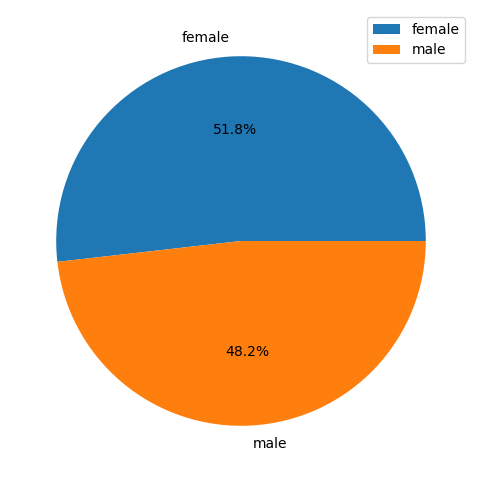

In [10]:
# Pie plot representation of percentage of males and females present in dataset

gender_count = data['gender'].value_counts()
label = data['gender'].value_counts().index
plt.figure(figsize=(6,6))
plt.pie(gender_count,labels=label, autopct='%1.1f%%')
plt.legend()
plt.show()


# 2. What do you think about the students' parental level of education?

In [11]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [12]:
# Relation between gender and parental level of education with average of reading score, math score and writing score

data.groupby(['gender','parental level of education'])[['reading score','math score','writing score']].mean()

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               74.120690   65.250000      74.000000
       bachelor's degree                77.285714   68.158730      78.380952
       high school                      68.202128   58.840426      66.691489
       master's degree                  76.805556   66.500000      77.638889
       some college                     73.550847   65.186441      74.050847
       some high school                 69.010989   58.780220      68.285714
male   associate's degree               67.622642   70.962264      65.688679
       bachelor's degree                68.090909   70.581818      67.654545
       high school                      61.284314   64.568627      58.450980
       master's degree                  74.608696   76.130435      72.608696
       some college                     65.212963   69.250000      63.555556
       some high school                 64.431818   67.636364      61.375000

Among students with the same parental level of education, female students have higher average reading and writing scores than their male students. Where male students have higher average math scores

In [13]:
# Relation between parental level of education and test preparation course with average of reading score, math and writing score

data.groupby(['parental level of education','test preparation course'])[['reading score', 'math score', 'writing score']].mean()

reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.414634   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    68.196429   
                            none                         63.164286   
master's degree             completed                    79.950000   
                            none                         73.897436   
some college                completed                    76.506494   
                            none                         65.979866   
some high school            completed                    70.779221   
                            none                         63.725490   

                                                     math score  writing score  
parental level of education test preparation course                             
associate's degree          completed                 72.085366      77.182927  
                            none                      65.571429      65.842857  
bachelor's degree           completed                 73.282609      78.695652  
                            none                      66.736111      69.986111  
high school                 completed                 65.464286      68.428571  
                            none                      60.364286      59.992857  
master's degree             completed                 72.100000      80.100000  
                            none                      69.307692      73.410256  
some college                completed                 71.922078      77.090909  
                            none                      64.651007      64.872483  
some high school            completed                 66.493506      70.363636  
                            none                      60.598039      60.754902

1. Students who have completed the test preparation course and with a bachelor’s degree as the parental level of education have    higher average math scores
2. Students who have completed the test preparation course and with a master’s degree as the parental level of education have      higher average reading scores
3. Students who have completed the test preparation course and with a master’s degree as the parental level of education have      higher average writing scores

In [14]:
# Average score

data['average score'] = (data['math score'] + data['writing score'] + data['reading score']) / 3

In [15]:
# Relation between gender and parental level of education with average score

data.groupby(['gender','parental level of education'])['average score'].mean()

gender  parental level of education
female  associate's degree             71.123563
        bachelor's degree              74.608466
        high school                    64.578014
        master's degree                73.648148
        some college                   70.929379
        some high school               65.358974
male    associate's degree             68.091195
        bachelor's degree              68.775758
        high school                    61.434641
        master's degree                74.449275
        some college                   66.006173
        some high school               64.481061
Name: average score, dtype: float64

Females with parental level of education bachelor's degree have higher average score. Males with parental level of education high school have lower average score


In [16]:
# Relation between parental level of education and test preparation course with average score

data.groupby(['parental level of education','test preparation course'])['average score'].mean()

parental level of education  test preparation course
associate's degree           completed                  75.227642
                             none                       66.423810
bachelor's degree            completed                  76.239130
                             none                       69.111111
high school                  completed                  67.363095
                             none                       61.173810
master's degree              completed                  77.383333
                             none                       72.205128
some college                 completed                  75.173160
                             none                       65.167785
some high school             completed                  69.212121
                             none                       61.692810
Name: average score, dtype: float64

Students with Master's degree as parental level of education and completed the test preperation course have higher average score 

# 3. Who scores the most on average for math, reading and writing based on   gender and test preparation course?

In [17]:
# Based on gender average

data.groupby(['gender'])[['reading score','math score','writing score']].mean()

,reading score,math score,writing score
gender,,,
female,72.590734,63.376448,72.467181
male,65.545643,68.821577,63.446058


1. Females have higher average reading score and writing score than males
2. Males have higher average math score than females

In [18]:
# Based on test preparation course average

data.groupby(['test preparation course'])[['reading score','math score','writing score']].mean()

,reading score,math score,writing score
test preparation course,,,
completed,74.175978,69.96648,74.684358
none,66.417445,63.78972,64.457944


Those who completed the test preparation course have higher average reading score,math score and writing score

In [19]:
# Based on both gender and test preparation course average

data.groupby(['gender','test preparation course'])[['reading score','math score','writing score']].mean()

reading score  math score  writing score
gender test preparation course                                          
female completed                    77.375000   67.108696      78.793478
       none                         69.955090   61.320359      68.982036
male   completed                    70.793103   72.988506      70.339080
       none                         62.581169   66.467532      59.551948

1. Females who completed test preparation course have higher average reading score,math score and writing score than those who    are not completed it.
2. Males who completed test preparation course have higher average reading score,math score and writing score than those who      are not completed it.
3. Females who completed test preparation course have higher average reading score and writing score than males who completed.
4. Males who completed test preparation course have higher average math score than females who completed.

# 4. What do you think about the scoring variation for math, reading and writing based on gender and test preparation course?

In [20]:
# Based on gender variance

data.groupby(['gender'])[['reading score','math score','writing score']].var()

,reading score,math score,writing score
gender,,,
female,207.677438,256.958593,220.369327
male,200.211010,211.889097,202.413924


Females have higher variance for reading score,math score and writing score than males

In [21]:
# Based on test preparation course variance

data.groupby(['test preparation course'])[['reading score','math score','writing score']].var()

,reading score,math score,writing score
test preparation course,,,
completed,183.265864,210.884027,175.202612
none,213.419851,246.668662,226.251739


Those who are not completed the test preparation course have variance for reading score,math score and writing score.

In [22]:
# Based on both gender and test preparation course variance

data.groupby(['gender','test preparation course'])[['reading score','math score','writing score']].var()

reading score  math score  writing score
gender test preparation course                                          
female completed                   161.175546  208.173913     149.836897
       none                        214.241220  272.602767     225.495172
male   completed                   185.297987  197.098133     166.098233
       none                        184.843553  205.513600     181.394687

1.Females not completed test preparation course have higher variance for reading score,math score and writing score than         females who completed it.
2.Males not completed test preparation course have higher variance for math score and writing score than males who completed     it.
3.Females not completed test preparation course have higher variance for reading score, math score and writing score than males   not completed.
4.Males completed test preparation course have higher variance for reading score than males not completed it.

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [23]:
data['math score'].quantile(0.75)

77.0

In [24]:
top_25_percent = data[data['math score']>=77].sort_values('math score',ascending=False)
print(top_25_percent)

     gender race/ethnicity parental level of education         lunch  \
999    male        group E           bachelor's degree      standard   
998    male        group E          associate's degree  free/reduced   
997    male        group D                some college      standard   
996    male        group A                some college      standard   
517  female        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
854    male        group D            some high school      standard   
855    male        group E          associate's degree  free/reduced   
856    male        group E            some high school      standard   
415  female        group B             master's degree  free/reduced   
414  female        group A                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  \
999               completed         100            100        